In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

# for Modelling
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler)
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import iqr
from scipy.stats import scoreatpercentile as pct

In [2]:
df_stats= pd.read_csv('Data_Marketing_Customer_Analysis_Round2.csv')
df_stats.drop(df_stats.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
df_stats

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
nulls_df = pd.DataFrame(round(df_stats.isna().sum()/len(df_stats),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Customer,0.00
1,State,5.78
2,Customer Lifetime Value,0.00
3,Response,5.78
4,Coverage,0.00
5,Education,0.00
6,Effective To Date,0.00
7,EmploymentStatus,0.00
8,Gender,0.00
9,Income,0.00


In [5]:
df_stats1= df_stats.drop(['Vehicle Type'], axis=1)
df_stats1

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


In [6]:
df_stats2=df_stats1.dropna(subset=['State'])
df_stats2

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [7]:
df_stats2.columns = df_stats2.columns.str.replace(' ','_')
df_stats2

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [8]:
mean_Months_Since_Last_Claim = np.mean(df_stats2.Months_Since_Last_Claim)
df_stats2.Months_Since_Last_Claim = df_stats2.Months_Since_Last_Claim.fillna(mean_Months_Since_Last_Claim)

C:\Users\Josephine\anaconda3\envs\DA_envt\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [9]:
df_stats2.Number_of_Open_Complaints = df_stats2.Number_of_Open_Complaints.fillna(0)

In [10]:
df_stats2['Vehicle_Class'] = df_stats2['Vehicle_Class'].fillna('Unknown')
df_stats2['Vehicle_Size'] = df_stats2['Vehicle_Size'].fillna('Unknown')

C:\Users\JOSEPH~1\AppData\Local\Temp/ipykernel_17780/794467580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats2['Vehicle_Class'] = df_stats2['Vehicle_Class'].fillna('Unknown')
C:\Users\JOSEPH~1\AppData\Local\Temp/ipykernel_17780/794467580.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stats2['Vehicle_Size'] = df_stats2['Vehicle_Size'].fillna('Unknown')


In [11]:
nulls_df = pd.DataFrame(round(df_stats2.isna().sum()/len(df_stats2),4)*100)
nulls_df = nulls_df.reset_index()
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df

,header_name,percent_nulls
0,Customer,0.0
1,State,0.0
2,Customer_Lifetime_Value,0.0
3,Response,0.0
4,Coverage,0.0
5,Education,0.0
6,Effective_To_Date,0.0
7,EmploymentStatus,0.0
8,Gender,0.0
9,Income,0.0


In [12]:
columns_drop = nulls_df[nulls_df['percent_nulls']>3]['header_name']  # dummy case with 3 
print(columns_drop.values)

[]


In [13]:
df_stats2.drop(["Customer_Lifetime_Value"],axis=1,inplace=True)
df_stats2.drop(["Effective_To_Date"],axis=1,inplace=True)

C:\Users\Josephine\anaconda3\envs\DA_envt\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
df_stats2

,Customer,State,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,...,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,DK49336,Arizona,No,Basic,College,Employed,M,48029,Suburban,Married,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,0,Suburban,Single,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,22139,Suburban,Single,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,49078,Suburban,Single,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,23675,Suburban,Married,...,31,0.0,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10904,QI63521,Nevada,No,Basic,High School or Below,Unemployed,M,0,Suburban,Single,...,32,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
10905,FE99816,Nevada,No,Premium,Bachelor,Unemployed,F,0,Suburban,Married,...,40,0.0,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,No,Basic,College,Employed,F,61146,Urban,Married,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,No,Extended,Bachelor,Employed,F,39837,Rural,Married,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


In [15]:
x=df_stats2.drop('Total_Claim_Amount', axis=1)
y=df_stats2.Total_Claim_Amount

In [16]:
x_num=x._get_numeric_data()
x_cat = x.select_dtypes("object")

### Normalize numerical variables

In [17]:
x_num_scaled = pd.DataFrame(StandardScaler().fit_transform(x_num), columns=x_num.columns)
x_num_scaled.shape

(10279, 6)

In [18]:
x_num_scaled

,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
0,0.345572,-0.936168,-8.322723e-01,0.138458,-0.406930,2.518140
1,-1.236998,-0.849070,-1.241762e+00,-0.792754,-0.406930,-0.823181
2,-0.507511,0.196116,1.931782e+00,-0.613675,-0.406930,-0.405516
3,0.380137,0.109017,-5.251552e-01,-1.616519,-0.406930,-0.405516
4,-0.456900,0.689675,1.818499e-16,-0.613675,-0.406930,1.682810
...,...,...,...,...,...,...
10274,-1.236998,2.721980,-1.156656e-01,-0.577859,-0.406930,-0.405516
10275,-1.236998,4.638152,1.818499e-16,-0.291332,-0.406930,1.682810
10276,0.777781,-0.820037,-8.322723e-01,0.711512,-0.406930,1.265145
10277,0.075643,3.128441,-4.227828e-01,0.532433,-0.406930,-0.405516


In [19]:
x_cat.Vehicle_Size.unique()

array(['Medsize', 'Small', 'Large', 'Unknown'], dtype=object)

### Categorical Variables Enconding

In [20]:
x_cat.drop(["Customer"],axis=1,inplace=True)
x_cat.head()

C:\Users\Josephine\anaconda3\envs\DA_envt\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,State,Response,Coverage,Education,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


### Ordinal Encoding

In [21]:
x_cat_ord = x_cat[["Response", "Coverage", "Education", "Renew_Offer_Type", "Vehicle_Size"]]
categories = [["No","Yes"], ["Basic", "Extended", "Premium"], ["High School or Below", "College", "Bachelor", "Master", "Doctor"], ["Offer1", "Offer2", "Offer3", "Offer4"], ["Not Defined", "Small", "Medsize", "Large", "Unknown"]]

ordinal_encoder = OrdinalEncoder(categories=categories)
x_cat_ord_encoded = pd.DataFrame(ordinal_encoder.fit_transform(x_cat_ord),columns=x_cat_ord.columns)

In [22]:
x_cat_ord_encoded

,Response,Coverage,Education,Renew_Offer_Type,Vehicle_Size
0,0.0,0.0,1.0,2.0,2.0
1,0.0,0.0,1.0,3.0,2.0
2,0.0,0.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,2.0
4,0.0,2.0,2.0,0.0,2.0
...,...,...,...,...,...
10274,0.0,0.0,0.0,0.0,2.0
10275,0.0,2.0,2.0,2.0,2.0
10276,0.0,0.0,1.0,1.0,2.0
10277,0.0,1.0,2.0,0.0,2.0


### One Hot Encoding (For Nominal Variables)

In [23]:
x_cat_nom = x_cat.drop(x_cat_ord.columns, axis=1)
x_cat_nom

,State,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Sales_Channel,Vehicle_Class
0,Arizona,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Agent,Four-Door Car
1,California,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Call Center,Four-Door Car
2,Washington,Employed,M,Suburban,Single,Personal Auto,Personal L3,Call Center,SUV
3,Oregon,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Branch,Four-Door Car
4,Oregon,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Branch,Four-Door Car
...,...,...,...,...,...,...,...,...,...
10904,Nevada,Unemployed,M,Suburban,Single,Personal Auto,Personal L2,Branch,Luxury SUV
10905,Nevada,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Web,Luxury Car
10906,Oregon,Employed,F,Urban,Married,Personal Auto,Personal L3,Branch,Four-Door Car
10907,Arizona,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Web,Luxury SUV


In [24]:
# with pd.get_dummies()
x_cat_nom_encoded = pd.get_dummies(x_cat_nom,drop_first=True)

#with drop_first = True, in the above code the df will have one series less foe every series, for eg., 
#arizona will be mapped 0,0,0,0 but we would not see a column for arizona

In [25]:
x_cat_nom_encoded = pd.DataFrame(OneHotEncoder(drop="first").fit_transform(x_cat_nom).toarray(),
                                 columns=OneHotEncoder(drop='first').fit(x_cat_nom).get_feature_names(input_features=x_cat_nom.columns))
x_cat_nom_encoded

C:\Users\Josephine\anaconda3\envs\DA_envt\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,State_California,State_Nevada,State_Oregon,State_Washington,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location_Code_Suburban,...,Policy_Special L3,Sales_Channel_Branch,Sales_Channel_Call Center,Sales_Channel_Web,Vehicle_Class_Luxury Car,Vehicle_Class_Luxury SUV,Vehicle_Class_SUV,Vehicle_Class_Sports Car,Vehicle_Class_Two-Door Car,Vehicle_Class_Unknown
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10274,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10275,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
10276,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10277,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [26]:
x_train, x_test, y_train, y_test=train_test_split(x_num_scaled, y, test_size=.20, random_state =1)

In [27]:
x_train

,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies
3804,-0.845384,0.225148,0.293824,-0.327148,-0.406930,-0.405516
10009,-0.206741,1.038070,-1.139389,-0.112253,-0.406930,-0.405516
8850,-1.236998,-0.703905,1.624665,1.463645,-0.406930,0.847479
2646,-0.178766,1.125169,-0.525155,-0.219700,-0.406930,-0.823181
2912,0.575433,-0.674872,1.624665,-0.327148,0.718698,-0.823181
...,...,...,...,...,...,...
2895,0.462710,-0.703905,-0.422783,1.785988,1.844326,-0.405516
7813,-0.405431,-0.703905,0.805686,0.138458,-0.406930,2.518140
905,-0.607779,-0.849070,0.191452,-1.544887,-0.406930,0.012149
5192,0.714648,0.399346,-0.422783,0.281722,-0.406930,0.847479


In [28]:
model = LinearRegression()
model.fit(x_train, y_train)
coefficients = list(model.coef_)
coefficients

[-101.62893267850971,
 184.54981775199207,
 -0.5689980487772194,
 -2.9408560497696152,
 -1.4872688630138389,
 -0.21520444848753348]

In [29]:
y_pred = model.predict(x_test)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
result

,y_test,y_pred
9938,95.925021,387.983565
7360,326.281835,296.346811
10844,547.200000,273.153801
3356,776.601764,368.326241
2102,572.522796,397.032480
...,...,...
10222,193.570320,417.275225
8068,638.400000,623.160854
1320,355.200000,262.772012
1157,731.559007,1015.947596


In [30]:
metrics = {"MSE":mse(y_test, y_pred), "RMSE":mse(y_test, y_pred, squared=False), "MAE":mae(y_test, y_pred), "R2":r2_score(y_test, y_pred)}

Text(0.5, 0, 'y_test - y_pred')

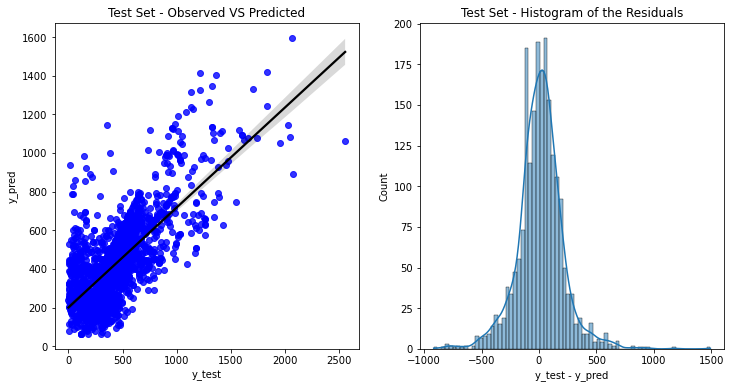

In [31]:
fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.regplot(x="y_test", y="y_pred", data=result, scatter_kws={"color": "blue"}, line_kws={"color": "black"}, ax=axs[0])
sns.histplot(y_test-y_pred, kde=True, ax=axs[1])

axs[0].set_title("Test Set - Observed VS Predicted")
axs[1].set_title("Test Set - Histogram of the Residuals")
axs[1].set_xlabel("y_test - y_pred")


In [32]:
metrics

{'MSE': 40550.92901178984,
 'RMSE': 201.37261236769473,
 'MAE': 143.23812849292304,
 'R2': 0.5031728617582382}

### Regression with all features

In [33]:
x = pd.concat([x_num_scaled, x_cat_ord_encoded, x_cat_nom_encoded],axis=1)

In [40]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state =1)

In [41]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10279 entries, 0 to 10278
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Income                          10279 non-null  float64
 1   Monthly_Premium_Auto            10279 non-null  float64
 2   Months_Since_Last_Claim         10279 non-null  float64
 3   Months_Since_Policy_Inception   10279 non-null  float64
 4   Number_of_Open_Complaints       10279 non-null  float64
 5   Number_of_Policies              10279 non-null  float64
 6   Response                        10279 non-null  float64
 7   Coverage                        10279 non-null  float64
 8   Education                       10279 non-null  float64
 9   Renew_Offer_Type                10279 non-null  float64
 10  Vehicle_Size                    10279 non-null  float64
 11  State_California                10279 non-null  float64
 12  State_Nevada                    

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)
coefficients = list(model.coef_)
coefficients

[-7.620755494894086,
 171.10861948582223,
 3.4537462732724573,
 -0.5883411196965453,
 -1.4621926905163176,
 1.8428326605039704,
 -23.18361643460413,
 -2.1725173387326446,
 -4.41197992999836,
 3.4968516273182626,
 -1.2065957117063137,
 6.343205943835431,
 8.819466952278123,
 -1.5038565162418671,
 8.791703728386961,
 -8.338655459679801,
 13.231931427320335,
 -7.966307473899722,
 66.15610745176902,
 18.821428176842364,
 380.47348060443676,
 220.02360626326134,
 -6.1269785948304945,
 60.1074372208393,
 1.5578599248471527,
 20.748500337516894,
 -6.269973234211864,
 4.602843276655501,
 4.792065610035364,
 -1.1416641525772917,
 -2.0925415326109147,
 39.59902952785771,
 -12.252198508527094,
 -6.59833068181385,
 1.9832663555340089,
 -0.6360577623974315,
 4.019523793298916,
 42.504951546308476,
 46.62989186628917,
 -6.544245911138685,
 -20.714361073139184,
 -0.31110826115889406,
 -2.0545605187269045]

In [43]:
y_pred = model.predict(x_test)
result = pd.DataFrame({"y_test":y_test, "y_pred":y_pred})
result

,y_test,y_pred
9938,95.925021,39.673925
7360,326.281835,257.421715
10844,547.200000,390.285790
3356,776.601764,548.895250
2102,572.522796,516.792790
...,...,...
10222,193.570320,61.084491
8068,638.400000,693.834184
1320,355.200000,395.943926
1157,731.559007,981.586409


In [44]:
metrics = {"MSE":mse(y_test, y_pred), "RMSE":mse(y_test, y_pred, squared=False), "MAE":mae(y_test, y_pred), "R2":r2_score(y_test, y_pred)}
metrics

{'MSE': 19801.877479099967,
 'RMSE': 140.7191439680471,
 'MAE': 95.83179692327951,
 'R2': 0.7573887859167201}

Text(0.5, 0, 'y_test - y_pred')

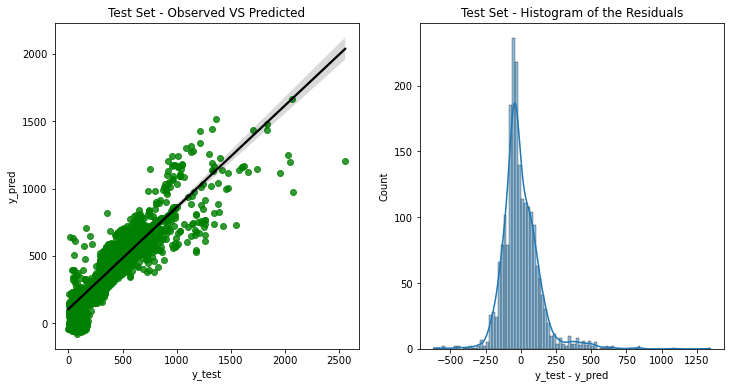

In [45]:
 fig, axs = plt.subplots(1,2,figsize=(12,6))

sns.regplot(x="y_test", y="y_pred", data=result, scatter_kws={"color": "green"}, line_kws={"color": "black"}, ax=axs[0])
sns.histplot(y_test-y_pred, kde=True, ax=axs[1])

axs[0].set_title("Test Set - Observed VS Predicted")
axs[1].set_title("Test Set - Histogram of the Residuals")
axs[1].set_xlabel("y_test - y_pred")
